In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import accuracy_score,mean_squared_error, mean_absolute_error, r2_score

In [ ]:
housing = pd.read_csv('Housing.csv')

In [ ]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
housing.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
housing.duplicated().sum()

np.int64(0)

In [ ]:
housing.columns = housing.columns.str.strip()

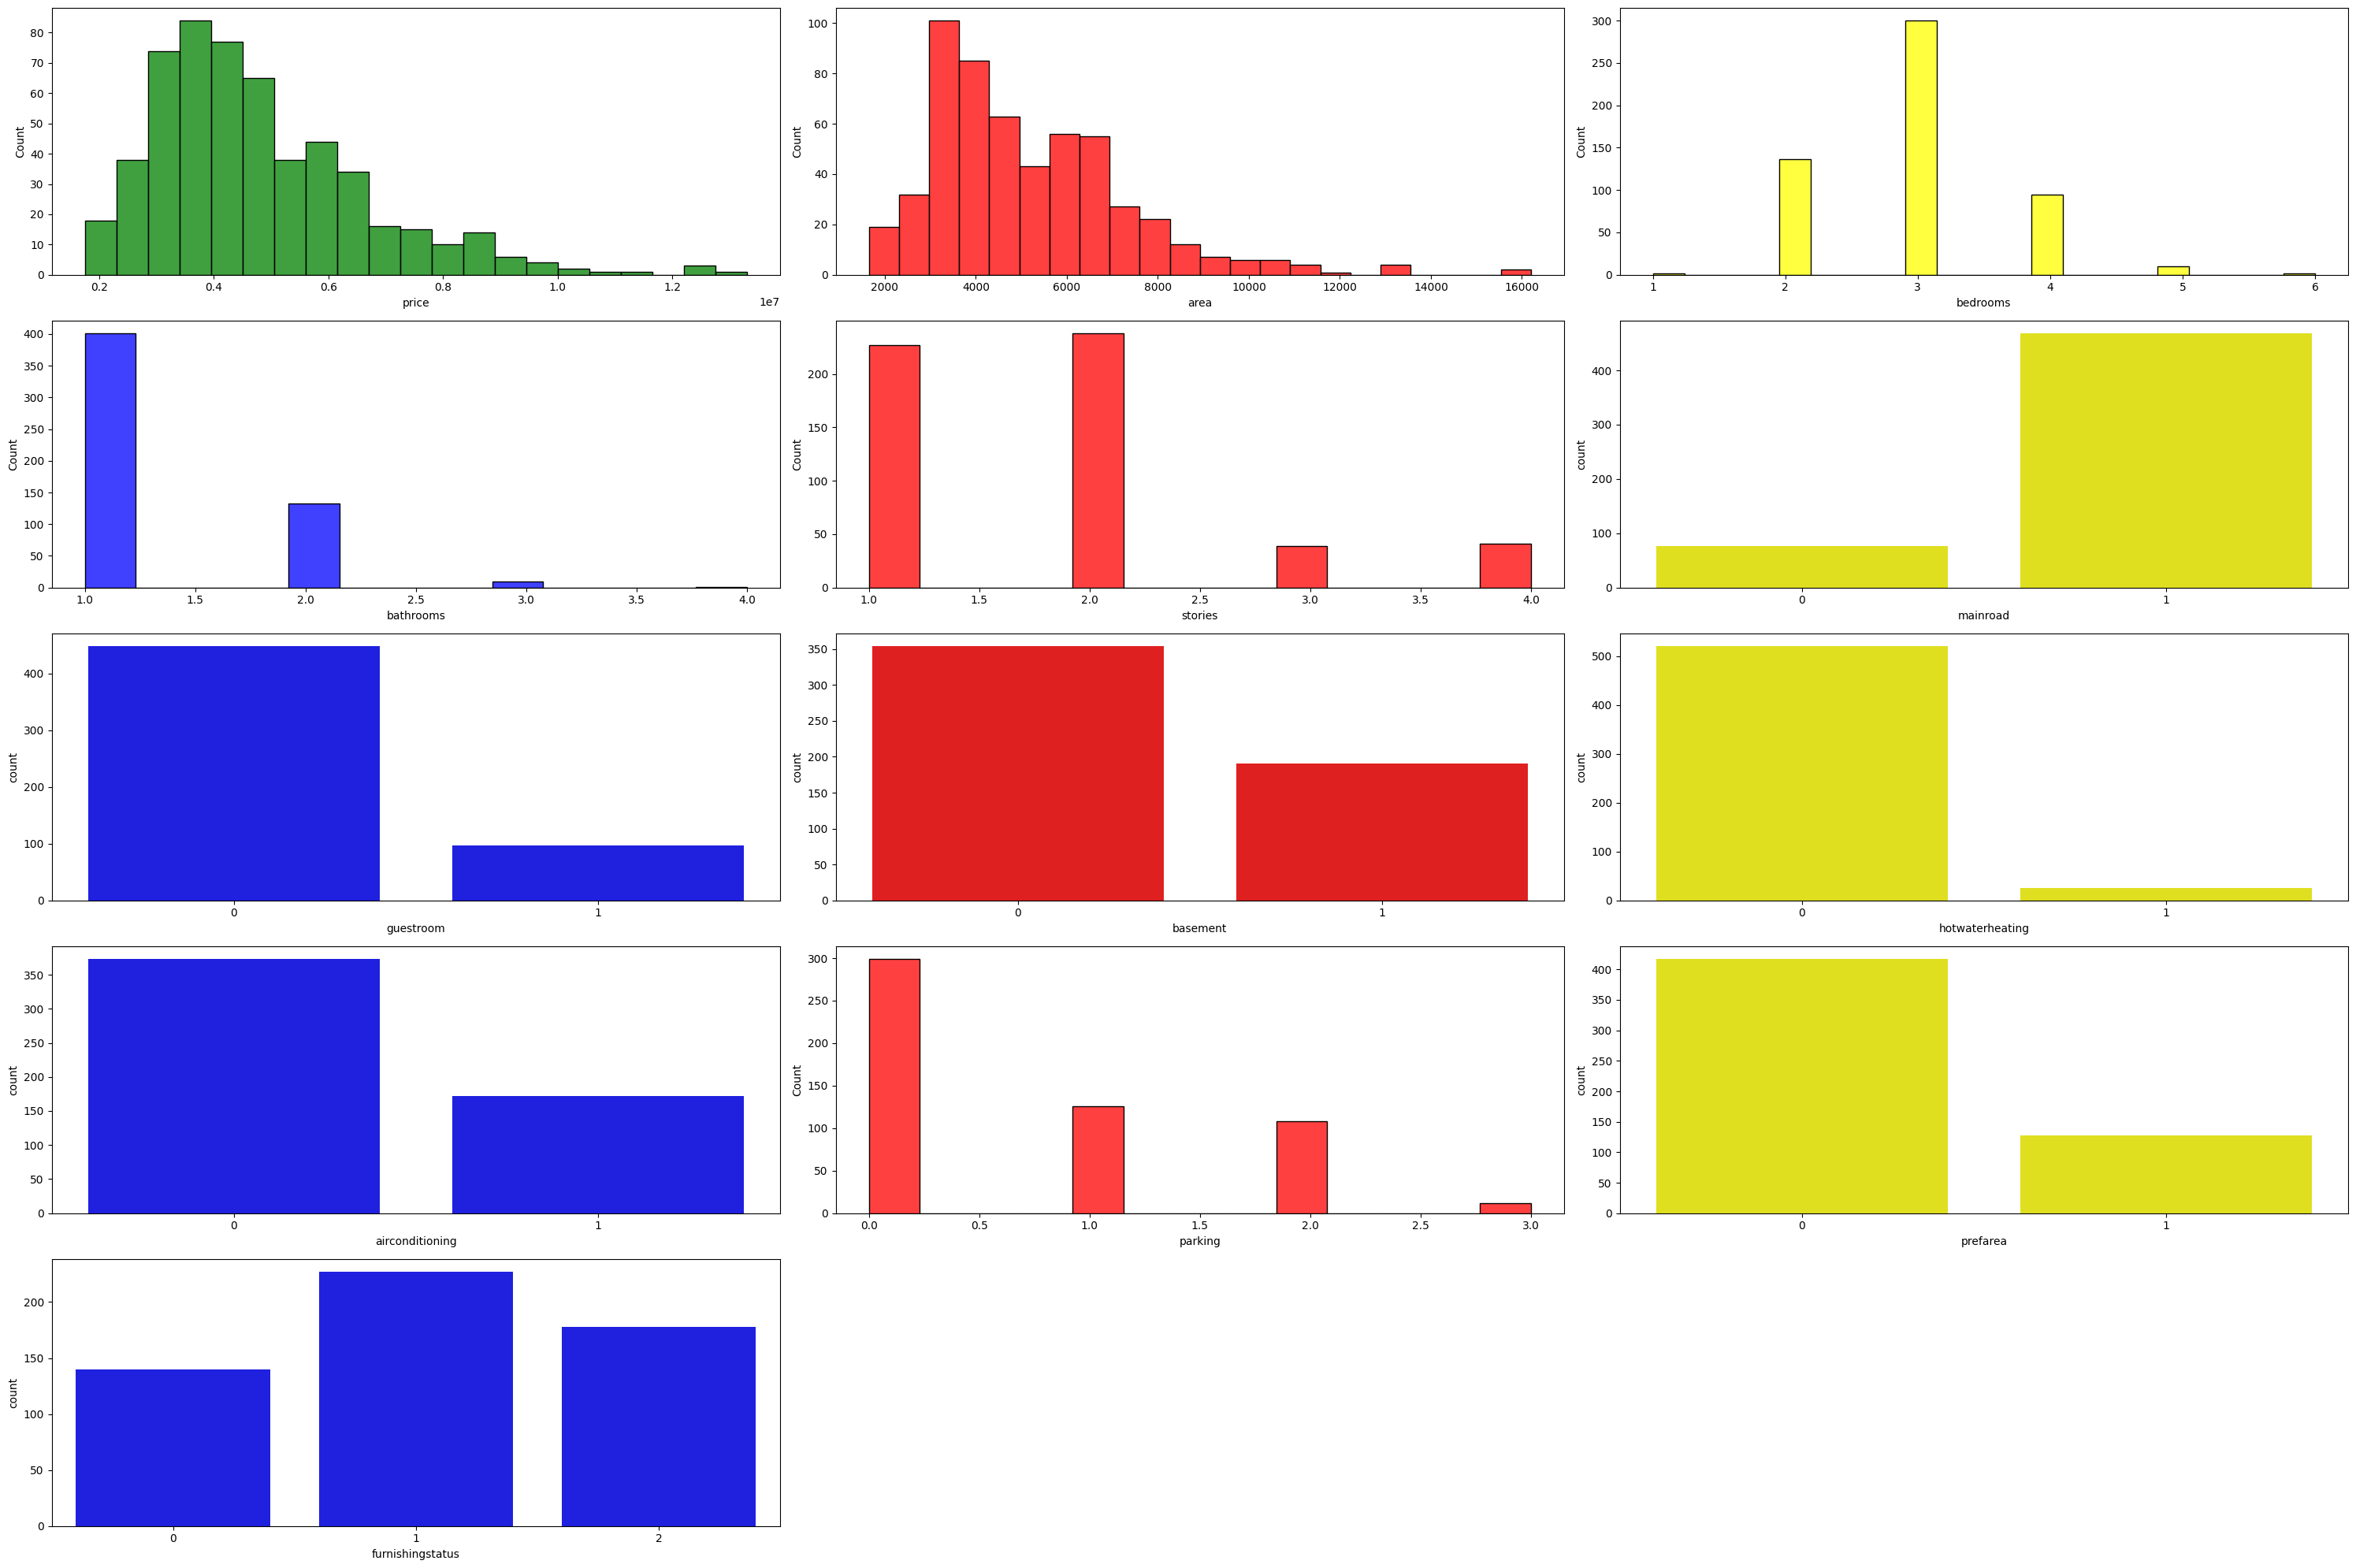

In [ ]:
# Set up the figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(30, 20))
axes = axes.flatten()

sns.histplot(housing['price'], ax=axes[0],color='green')

sns.histplot(housing['area'], ax=axes[1],color='red')

sns.histplot(housing['bedrooms'], ax=axes[2],color='yellow')

sns.histplot(housing['bathrooms'], ax=axes[3],color='blue')

sns.histplot(housing['stories'], ax=axes[4],color='red')

sns.countplot(x=housing['mainroad'], ax=axes[5],color='yellow')


sns.countplot(x=housing['guestroom'], ax=axes[6],color='blue')


sns.countplot(x=housing['basement'], ax=axes[7],color='red')


sns.countplot(x=housing['hotwaterheating'], ax=axes[8],color='yellow')

sns.countplot(x=housing['airconditioning'], ax=axes[9],color='blue')

sns.histplot(housing['parking'], ax=axes[10],color="red")

sns.countplot(x=housing['prefarea'], ax=axes[11],color="yellow")


sns.countplot(x=housing['furnishingstatus'], ax=axes[12],color="blue")

for j in range(13, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

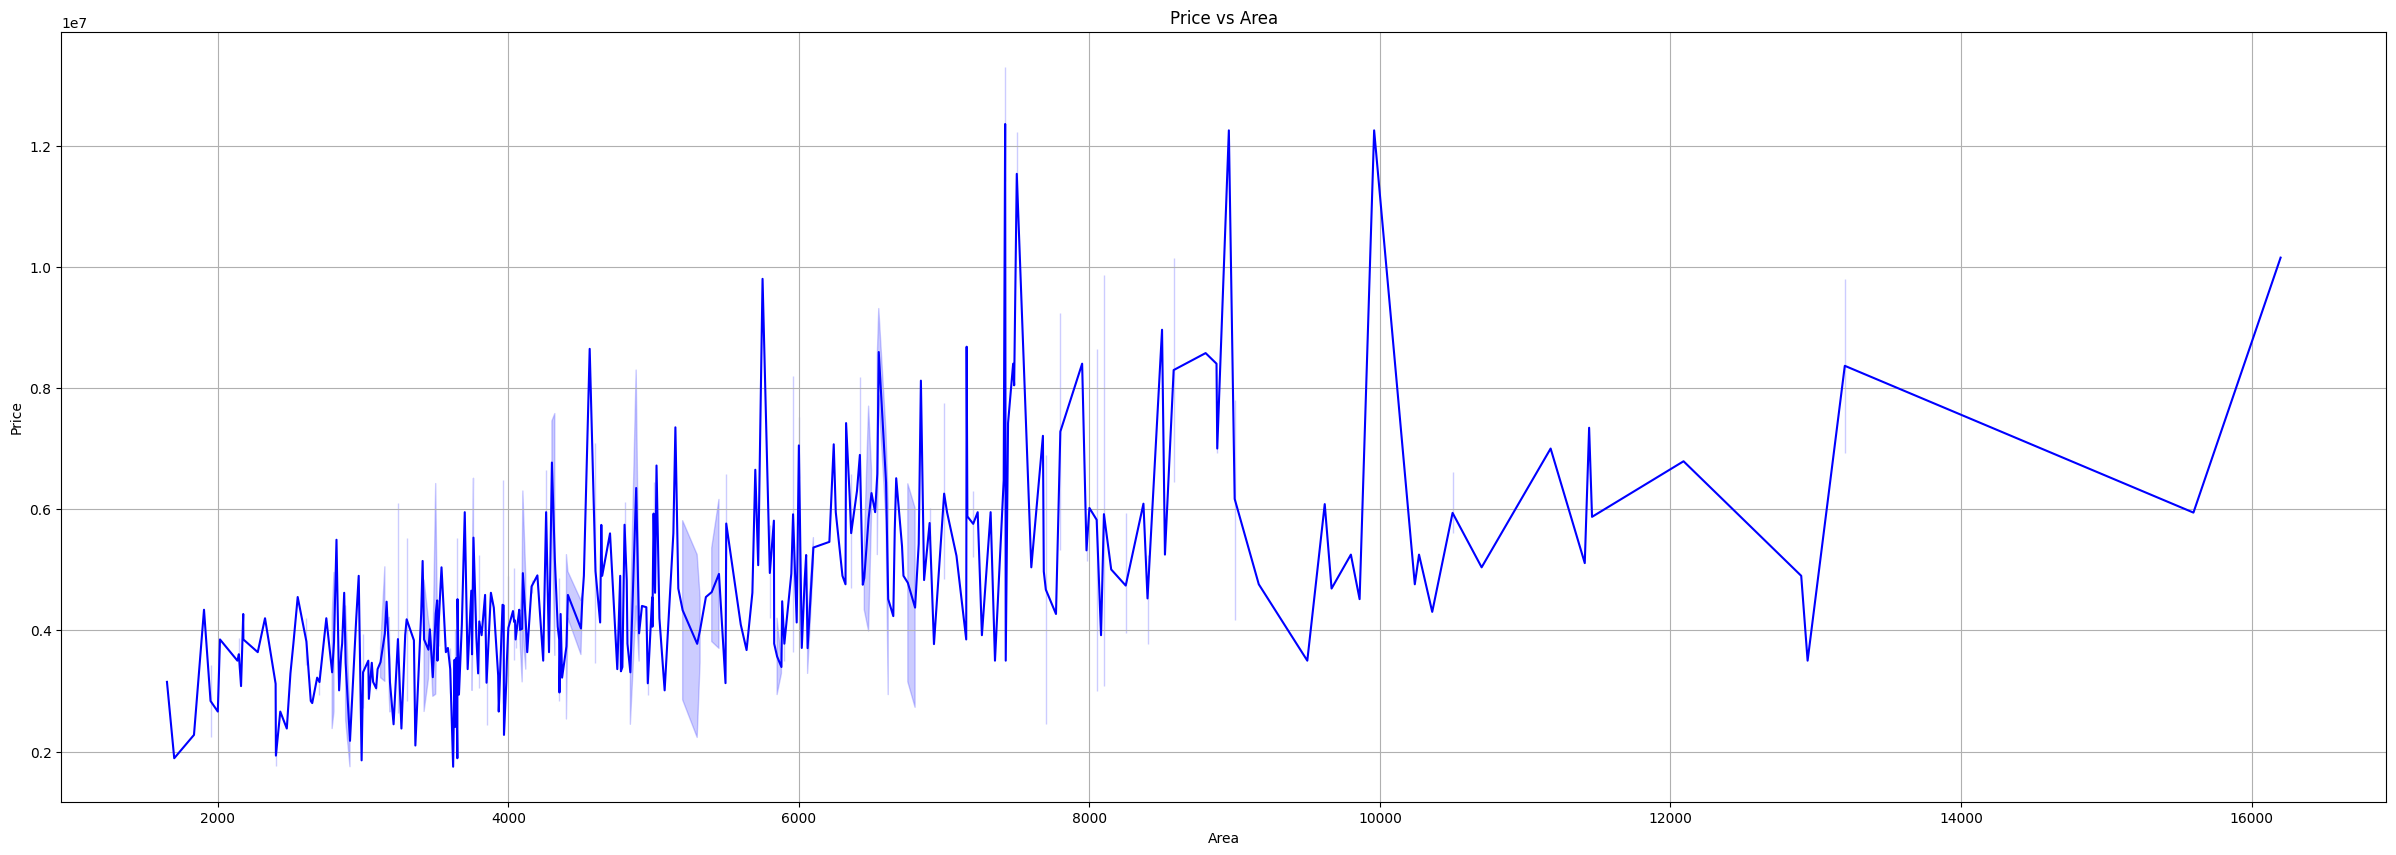

In [ ]:
plt.figure(figsize=(30, 10))
sns.lineplot(x=housing['area'], y=housing['price'], color='blue')
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()


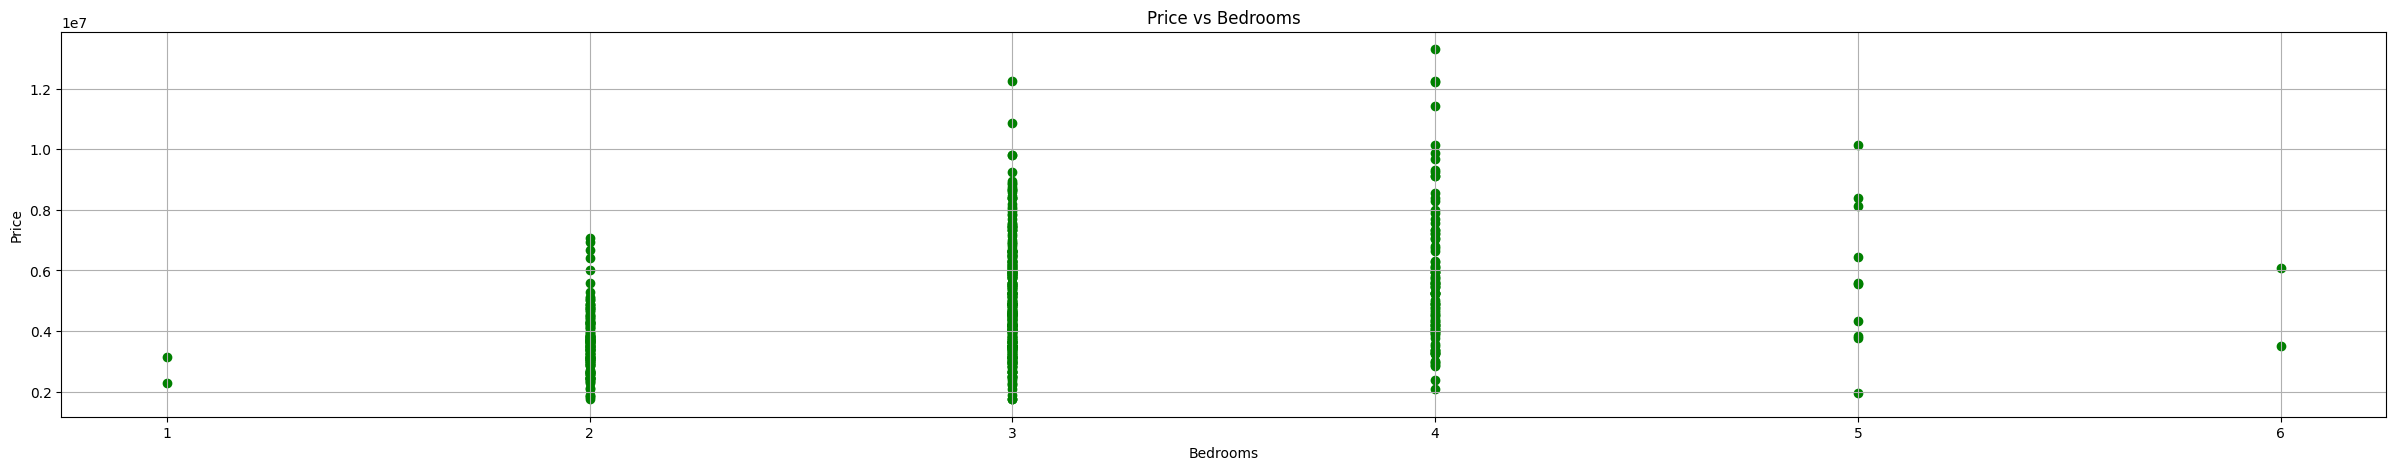

In [ ]:

plt.figure(figsize=(30, 5))
plt.scatter(housing['bedrooms'], housing['price'], color='green')
plt.title('Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()


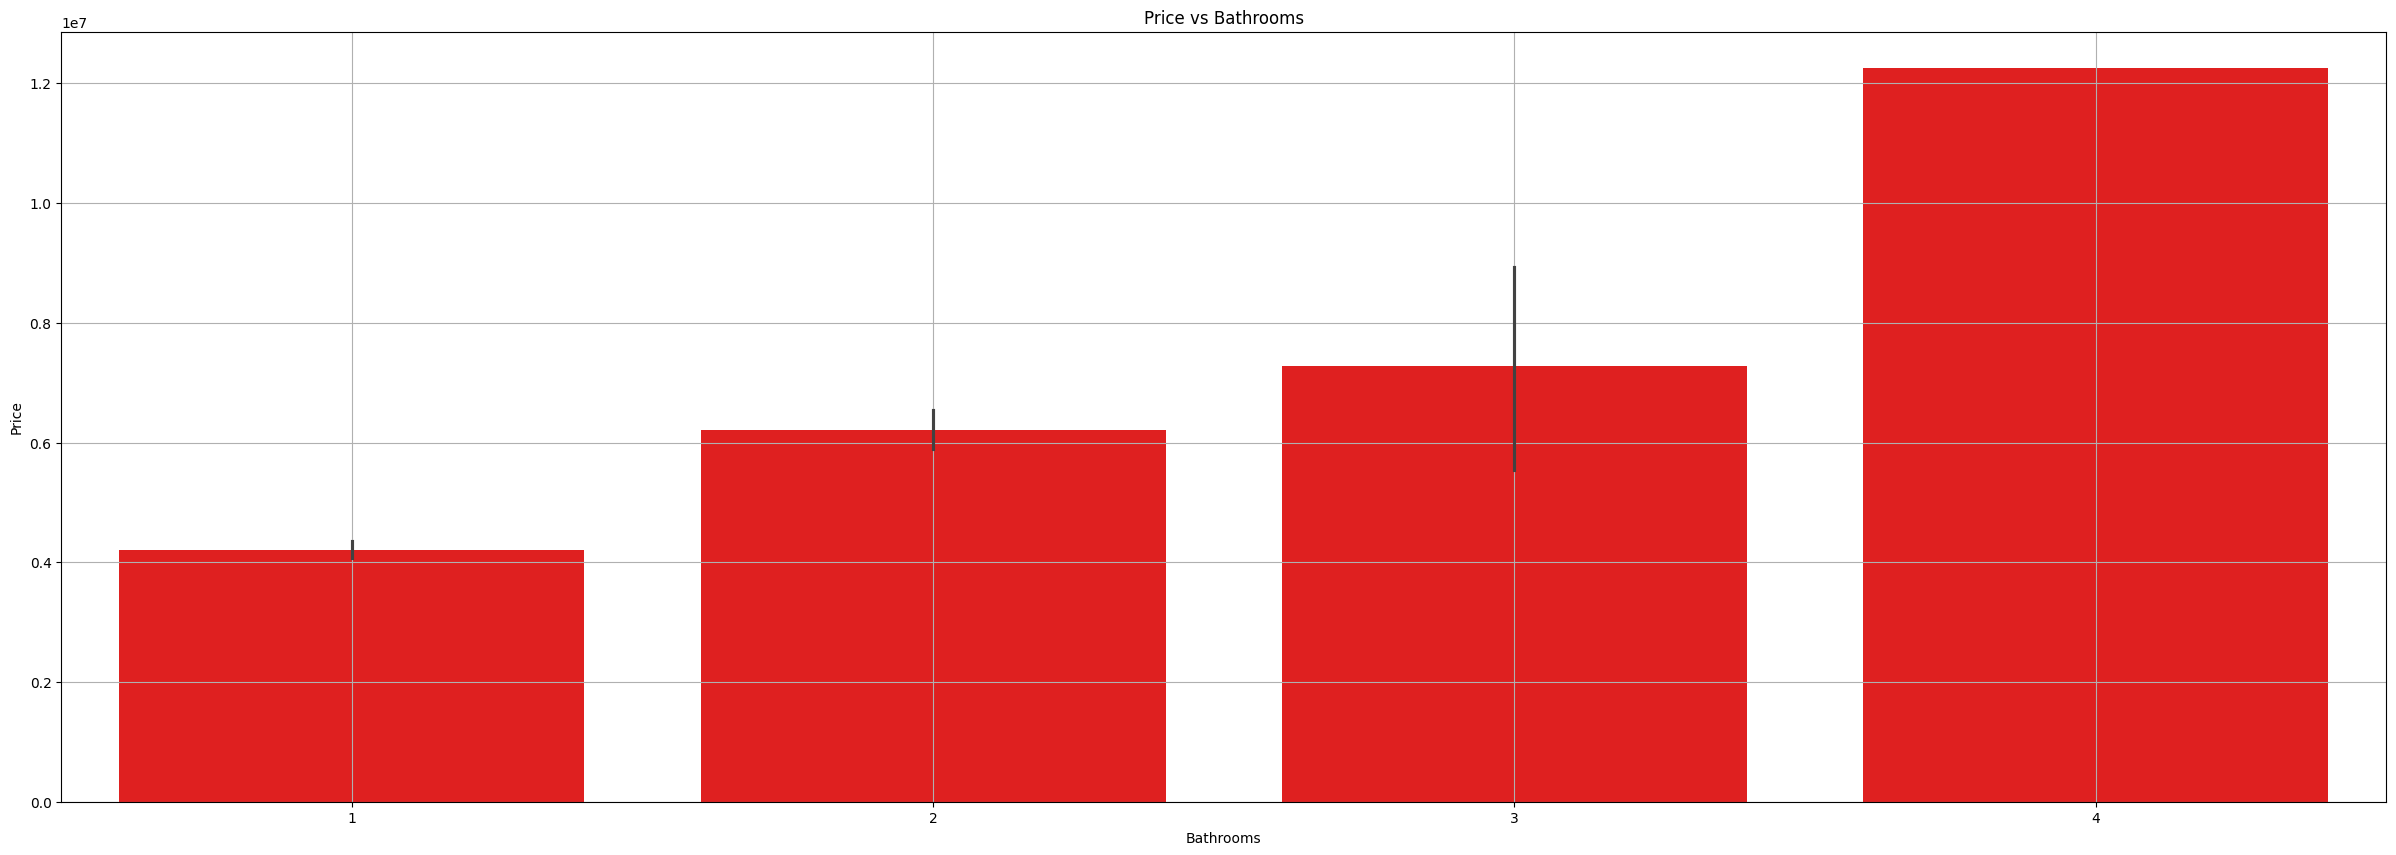

In [ ]:
plt.figure(figsize=(30, 10))
sns.barplot(x=housing['bathrooms'], y=housing['price'], color='red')
plt.title('Price vs Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()


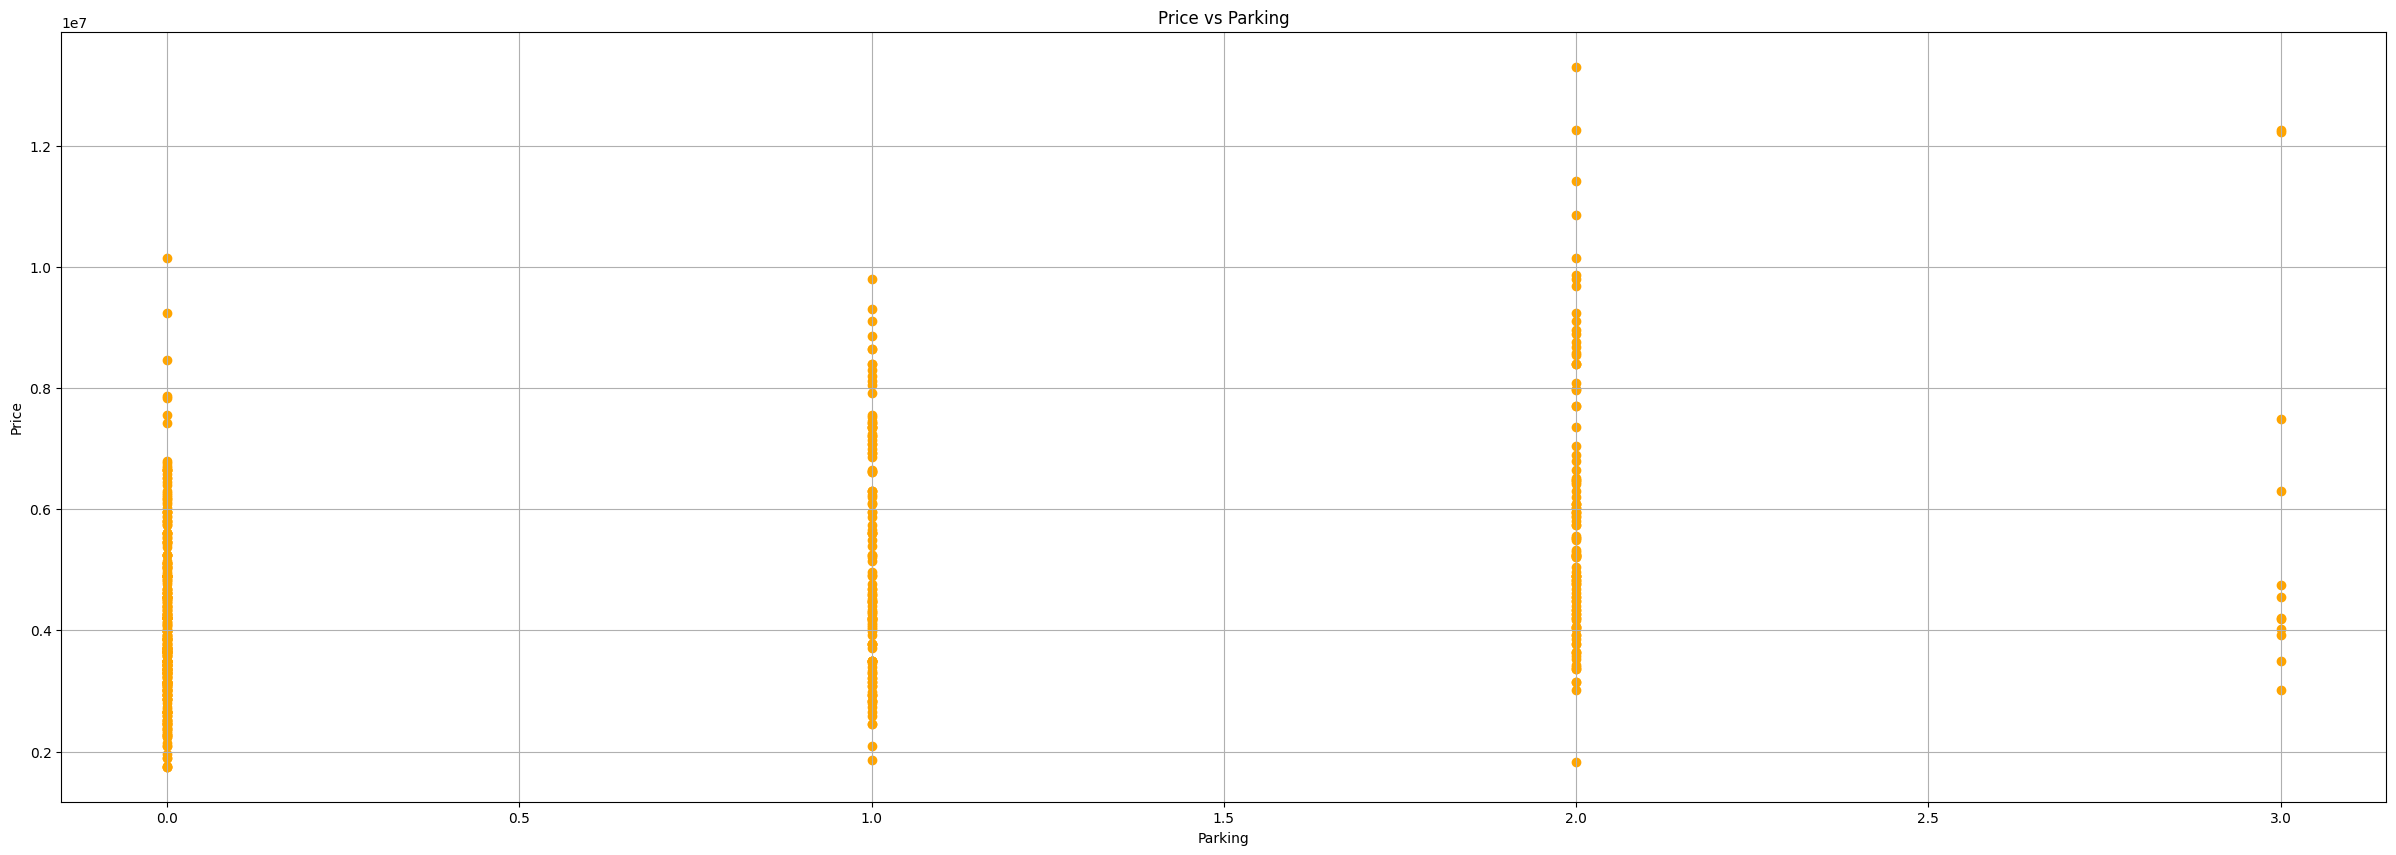

In [ ]:
plt.figure(figsize=(30, 10))
plt.scatter(housing['parking'], housing['price'], color='orange')
plt.title('Price vs Parking')
plt.xlabel('Parking')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
#Encoding categorical features
le = LabelEncoder()
housing['mainroad'] = le.fit_transform(housing['mainroad'])
housing['guestroom'] = le.fit_transform(housing['guestroom'])
housing['basement'] = le.fit_transform(housing['basement'])
housing['hotwaterheating'] = le.fit_transform(housing['hotwaterheating'])
housing['airconditioning'] = le.fit_transform(housing['airconditioning'])
housing['prefarea'] = le.fit_transform(housing['prefarea'])
housing['furnishingstatus'] = le.fit_transform(housing['furnishingstatus'])
#creating new features
housing['total_rooms'] = housing['bedrooms'] + housing['bathrooms']
housing['price_per_room'] = housing['price'] / housing['total_rooms']
housing['price_per_area'] = housing['price'] / housing['area']
housing['price_per_bathroom'] = housing['price'] / housing['bathrooms']
housing['area_bedrooms'] = housing['area'] * housing['bedrooms']
housing['area_bathrooms'] = housing['area'] * housing['bathrooms']
housing['area_furnishingstatus'] = housing['area'] * housing['furnishingstatus']

In [ ]:
# deal with skewed price and area
housing['log_price'] = np.log(housing['price'])
housing['log_area'] = np.log(housing['area'])

In [ ]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,furnishingstatus,total_rooms,price_per_room,price_per_area,price_per_bathroom,area_bedrooms,area_bathrooms,area_furnishingstatus,log_price,log_area
0,13300000,7420,4,2,3,1,0,0,0,1,...,0,6,2.216667e+06,1792.452830,6650000.0,29680,14840,0,16.403275,8.911934
1,12250000,8960,4,4,4,1,0,0,0,1,...,0,8,1.531250e+06,1367.187500,3062500.0,35840,35840,0,16.321036,9.100526
2,12250000,9960,3,2,2,1,0,1,0,0,...,1,5,2.450000e+06,1229.919679,6125000.0,29880,19920,9960,16.321036,9.206332
3,12215000,7500,4,2,2,1,0,1,0,1,...,0,6,2.035833e+06,1628.666667,6107500.0,30000,15000,0,16.318175,8.922658
4,11410000,7420,4,1,2,1,1,1,0,1,...,0,5,2.282000e+06,1537.735849,11410000.0,29680,7420,0,16.250001,8.911934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,...,2,3,6.066667e+05,606.666667,1820000.0,6000,3000,6000,14.414347,8.006368
541,1767150,2400,3,1,1,0,0,0,0,0,...,1,4,4.417875e+05,736.312500,1767150.0,7200,2400,2400,14.384879,7.783224
542,1750000,3620,2,1,1,1,0,0,0,0,...,2,3,5.833333e+05,483.425414,1750000.0,7240,3620,7240,14.375126,8.194229
543,1750000,2910,3,1,1,0,0,0,0,0,...,0,4,4.375000e+05,601.374570,1750000.0,8730,2910,0,14.375126,7.975908


price                    1.000000
log_price                0.969010
price_per_room           0.768193
area_bathrooms           0.674764
area_bedrooms            0.611196
price_per_bathroom       0.570693
log_area                 0.561231
area                     0.535997
bathrooms                0.517545
total_rooms              0.511809
airconditioning          0.452954
stories                  0.420712
price_per_area           0.392921
parking                  0.384394
bedrooms                 0.366494
prefarea                 0.329777
mainroad                 0.296898
guestroom                0.255517
basement                 0.187057
hotwaterheating          0.093073
area_furnishingstatus   -0.013093
furnishingstatus        -0.304721
Name: price, dtype: float64


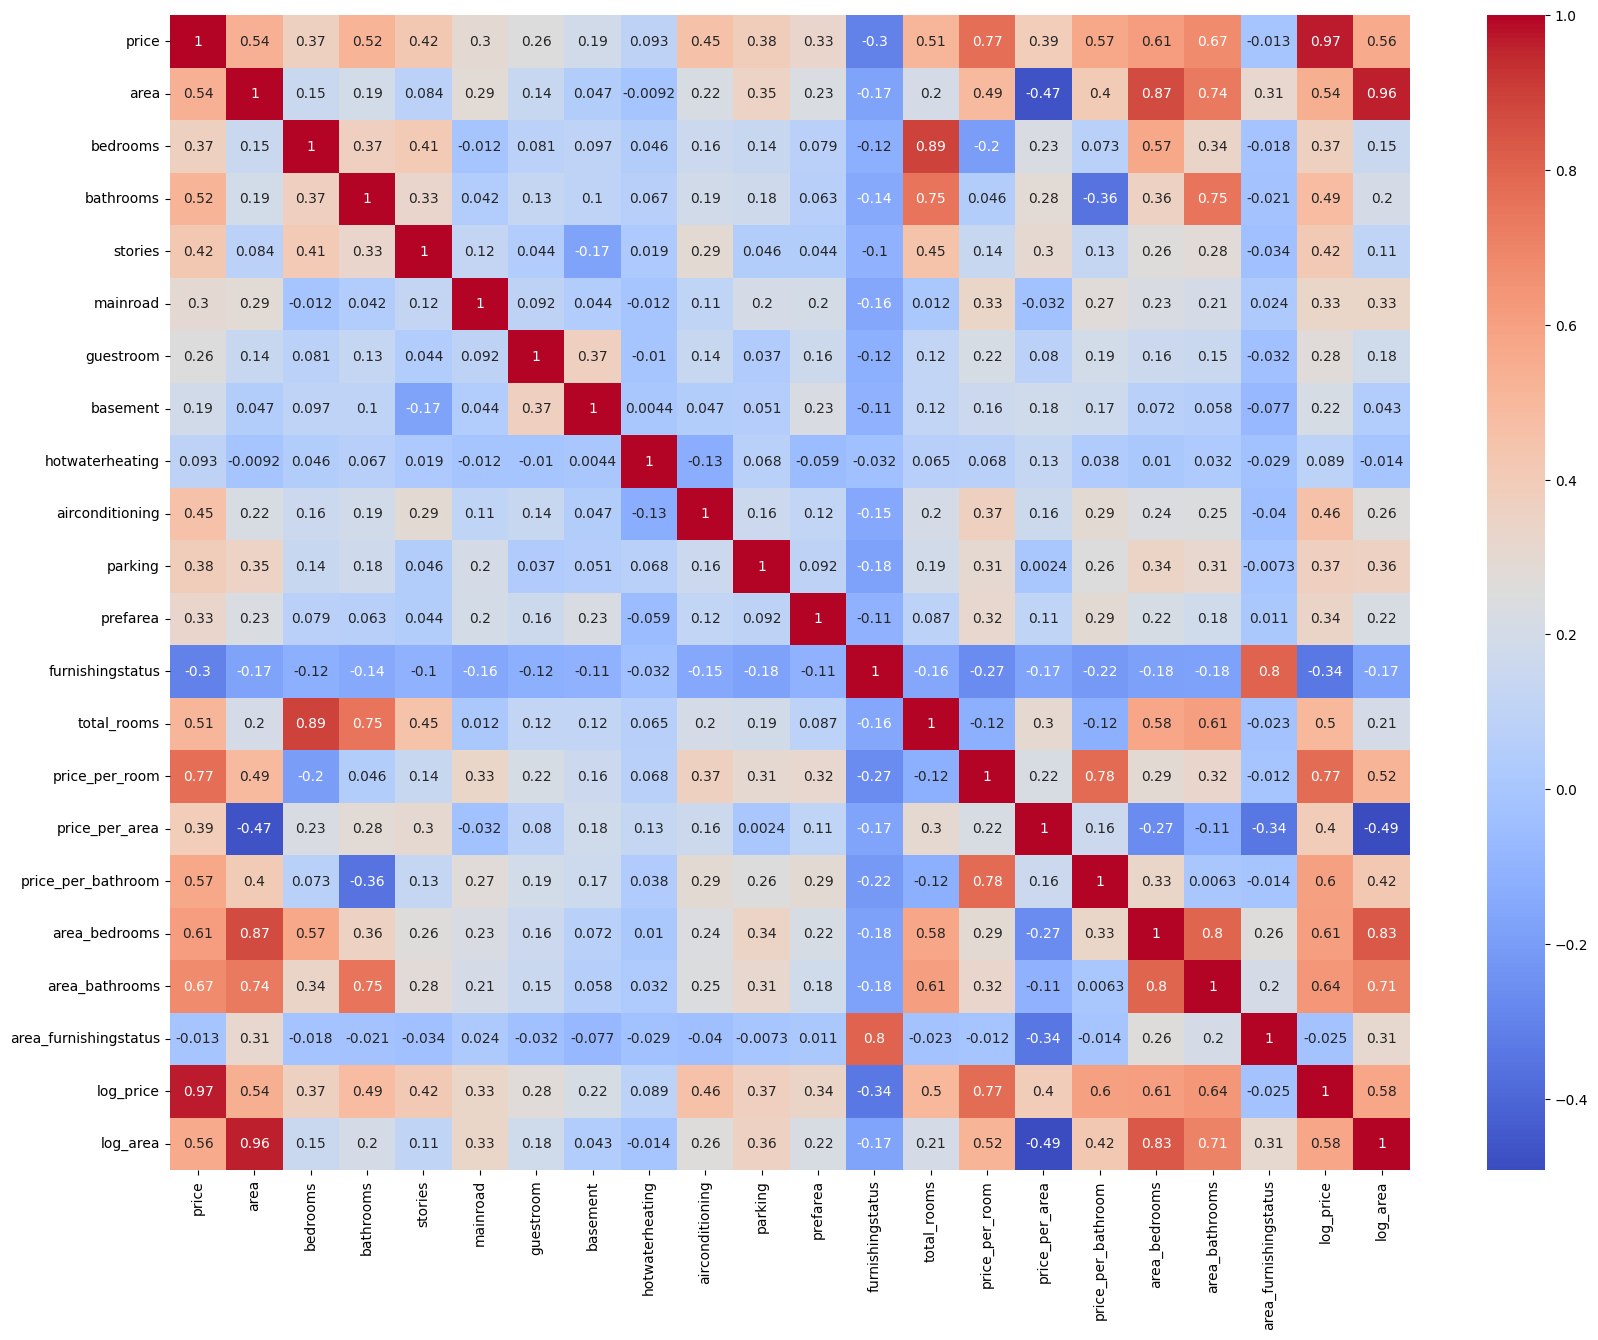

In [ ]:
correlation = housing.corr()['price'].sort_values(ascending=False)
print(correlation)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(housing.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
#split features and target
X = housing.drop(['price','log_price'],axis=1)
y = housing['log_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
accuracy_score=model.score(X_test,y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('-------------------- Mohamed--------------------')
print(' ')
print(accuracy_score*100)
print(' ')
print('-------------------Ayman------------------------')
print(' ')
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(' ')
print('------------------Fathy-------------------------')
print(' ')
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(' ')
print('--------------EL-Halmoushy---------------------')
print(' ')
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(' ')
print('------------------------------------------------')

print(f"R² Score: {r2:.4f}")


-------------------- Mohamed--------------------
 
98.11790745806447
 
-------------------Ayman------------------------
 
Mean Squared Error (MSE): 0.0036
 
------------------Fathy-------------------------
 
Root Mean Squared Error (RMSE): 0.0603
 
--------------EL-Halmoushy---------------------
 
Mean Absolute Error (MAE): 0.0429
 
------------------------------------------------
R² Score: 0.9812


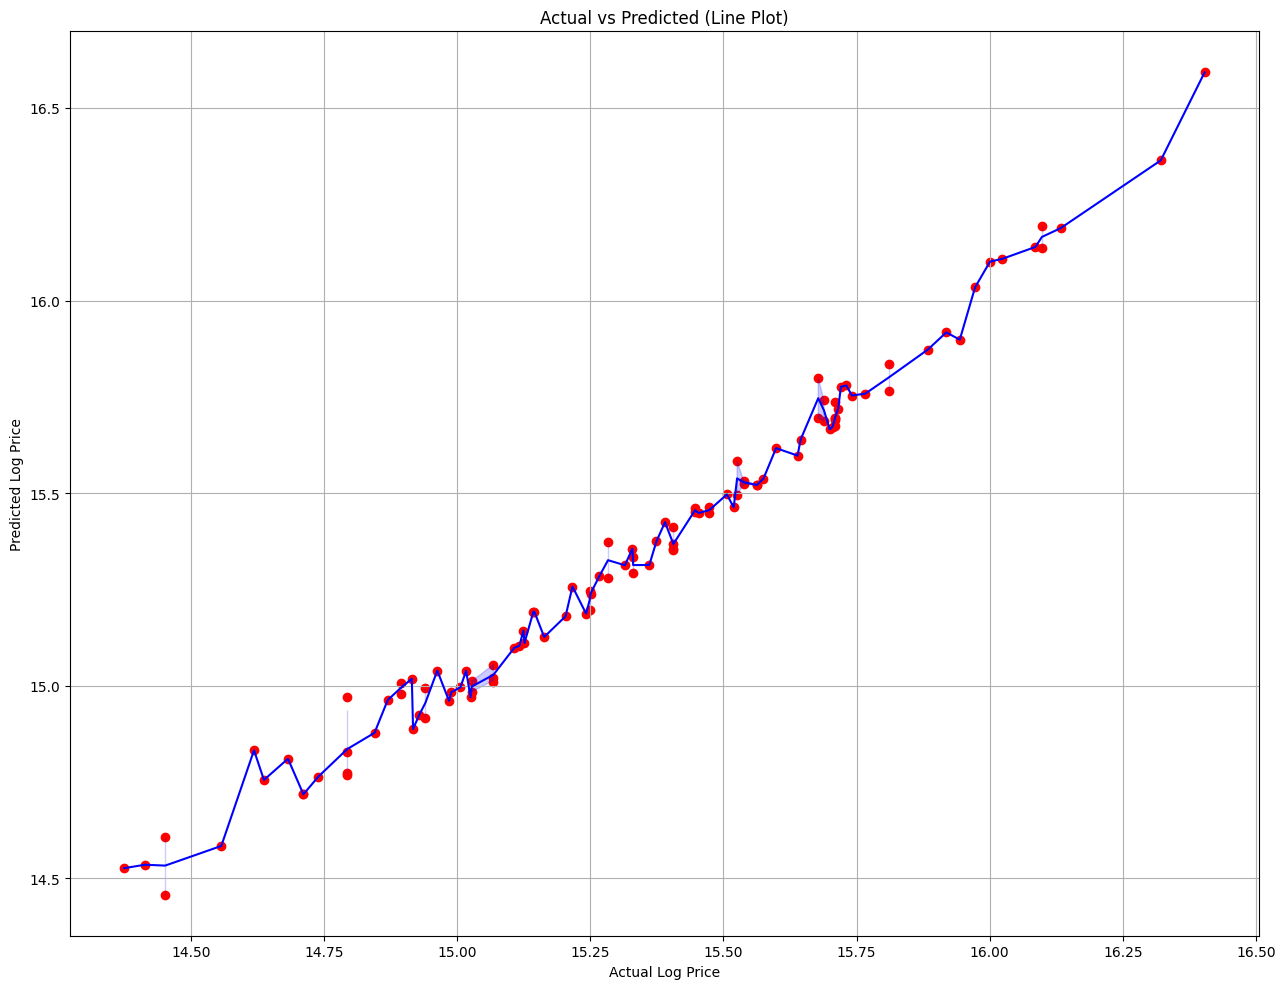

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

axes[0].scatter(y_test, y_pred, color='red')
axes[0].set_xlabel("Actual Log Price")
axes[0].set_ylabel("Predicted Log Price")
axes[0].set_title("Actual vs Predicted (Scatter Plot)")
axes[0].grid(True)
sns.lineplot(x=y_test, y=y_pred, color='blue', ax=axes[0])
axes[0].set_xlabel("Actual Log Price")
axes[0].set_ylabel("Predicted Log Price")
axes[0].set_title("Actual vs Predicted (Line Plot)")
axes[0].grid(True)
for j in range(1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)
acc_lasso=lasso.score(X_test,y_test)
print(acc_lasso*100)
print(f"Lasso Regression Results:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


95.75936142598209
Lasso Regression Results:
R² Score: 0.9576
RMSE: 0.0905
MAE: 0.0636
